Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 32)            │        288 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 64)            │      2,112 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_8 (Dense)             │ (None, 8)             │        520 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_9 (Dense)             │ (None, 1)             │          9 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

(100000,) 100000
total_n: 100000, train_n: 70000, val_n: 10000, test_n: 20000
Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 12738.3506 - mae: 61.8553 - val_loss: 5.9867 - val_mae: 1.4743
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.7947 - mae: 1.4239 - val_loss: 3.2693 - val_mae: 1.3125
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1753 - mae: 1.0411 - val_loss: 0.6285 - val_mae: 0.5542
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3373 - mae: 0.8131 - val_loss: 0.4185 - val_mae: 0.4901
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.4632 - mae: 0.8159 - val_loss: 0.3790 - val_mae: 0.4057
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.4621 - mae: 0.7655 - val_loss: 0.6114 - val_mae: 0.6559
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.6606 - mae: 0.5623 - val_loss: 2.4040 - val_mae: 1.0236
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.1148 - mae:

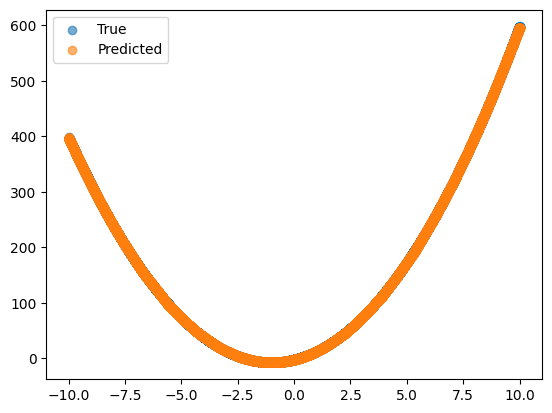

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


def build_model():
    inputs = Input((1,))
    h0 = Dense(8, activation='relu')(inputs)
    h1 = Dense(32, activation='relu')(h0)
    h2 = Dense(64, activation='relu')(h1)
    h3 = Dense(8, activation='relu')(h2)
    outputs = Dense(1)(h3)

    model = Model(inputs, outputs)
    model.summary(show_trainable=True)

    return model


def my_polynomial(x):
    y = 5 * x**2 + 10 * x - 2
    return y


def data_process(n=100000):
    x = np.random.uniform(low=-10, high=10, size=n)
    y = my_polynomial(x)
    return x, y


def prepare_train_val_test():
    x, y = data_process()
    total_n = len(x)
    print(x.shape, total_n)

    indices = np.random.permutation(total_n)
    x, y = x[indices], y[indices]

    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)
    test_n = total_n - train_n - val_n

    trainX = x[: train_n]
    trainY = y[: train_n]
    valX = x[train_n: train_n + val_n]
    valY = y[train_n: train_n + val_n]
    testX = x[train_n + val_n:]
    testY = y[train_n + val_n:]
    print('total_n: {}, train_n: {}, val_n: {}, test_n: {}'.format(len(x), len(trainX), len(valX), len(testX)))

    return (trainX, trainY), (valX, valY), (testX, testY)


def main():
    #--- Build model
    model = build_model()
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    #--- Prepare data
    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

    #--- Train model
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=10)

    #--- Predict
    y_pred = model.predict(testX)

    #--- Plot
    plt.scatter(testX, testY, label="True", alpha=0.6)
    plt.scatter(testX, y_pred, label="Predicted", alpha=0.6)
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


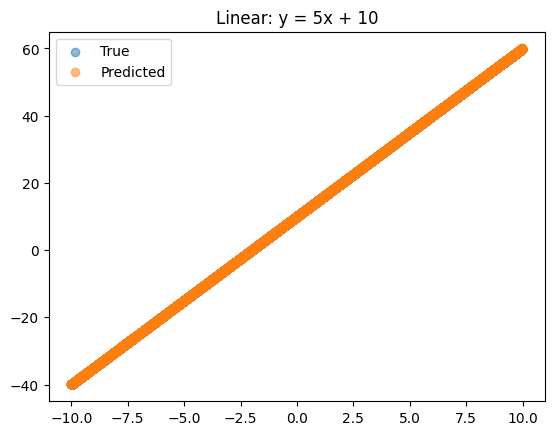

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


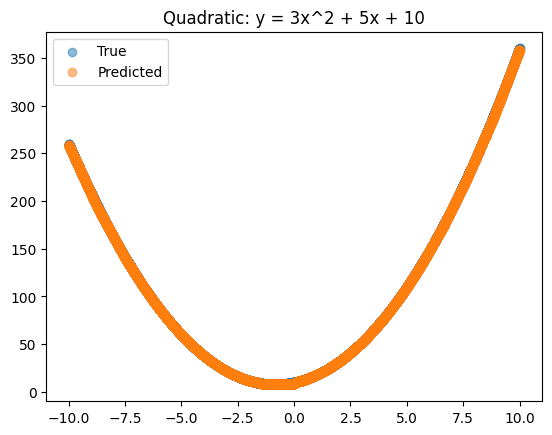

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


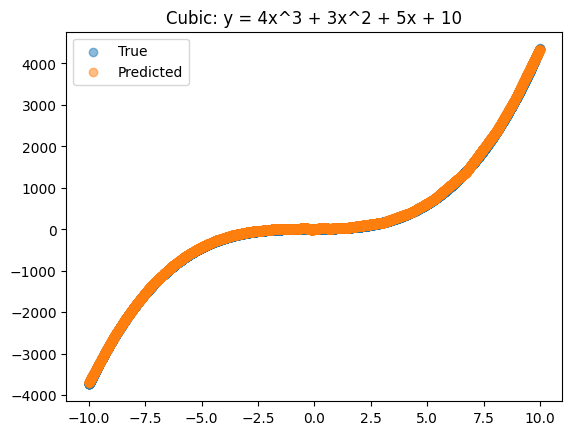

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


# ---------------- MODEL ----------------
def build_model():
    inputs = Input((1,))
    h0 = Dense(16, activation='relu')(inputs)
    h1 = Dense(32, activation='relu')(h0)
    h2 = Dense(64, activation='relu')(h1)
    h3 = Dense(16, activation='relu')(h2)
    outputs = Dense(1)(h3)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# ---------------- POLYNOMIALS ----------------
def linear_fn(x):
    return 5*x + 10

def quadratic_fn(x):
    return 3*x**2 + 5*x + 10

def cubic_fn(x):
    return 4*x**3 + 3*x**2 + 5*x + 10


# ---------------- DATA ----------------
def generate_data(fn, n=50000):
    x = np.random.uniform(-10, 10, n)
    y = fn(x)
    return x, y


def split_data(x, y):
    idx = np.random.permutation(len(x))
    x, y = x[idx], y[idx]

    train_n = int(0.7*len(x))
    val_n   = int(0.1*len(x))

    trainX, trainY = x[:train_n], y[:train_n]
    valX, valY     = x[train_n:train_n+val_n], y[train_n:train_n+val_n]
    testX, testY   = x[train_n+val_n:], y[train_n+val_n:]

    return (trainX,trainY),(valX,valY),(testX,testY)


# ---------------- TRAIN & PLOT ----------------
def run_experiment(fn, title):
    x, y = generate_data(fn)
    (trainX,trainY),(valX,valY),(testX,testY) = split_data(x,y)

    model = build_model()
    model.fit(trainX, trainY, validation_data=(valX,valY),
              epochs=15, batch_size=64, verbose=0)

    y_pred = model.predict(testX)

    plt.figure()
    plt.scatter(testX, testY, label="True", alpha=0.5)
    plt.scatter(testX, y_pred, label="Predicted", alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()


# ---------------- MAIN ----------------
def main():
    run_experiment(linear_fn, "Linear: y = 5x + 10")
    run_experiment(quadratic_fn, "Quadratic: y = 3x^2 + 5x + 10")
    run_experiment(cubic_fn, "Cubic: y = 4x^3 + 3x^2 + 5x + 10")


if __name__ == "__main__":
    main()
